In [2]:
import yaml
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ray

In [ ]:
# Read ray tune experiment results
experiment_name = "umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_30.60.90...300"
path = os.path.join("ray_results", experiment_name)

In [3]:
data = pd.read_csv('umap_hyperparameters_on_kuhar.standartized_balanced_starting_with_200/results/data.csv')
data

,Unnamed: 0,score,time_this_iter_s,done,training_iteration,trial_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,config/umap_mdist,config/umap_ncomp,config/umap_neigh,config/umap_spread,logdir
0,0,0.370892,110.235134,False,1,df956333,2023-08-28_19-33-38,1693251218,110.235134,1439017,84233402a856,172.17.0.8,110.235134,1,0.100000,200,15,1,/home/darlinne.soto/ray_results/umap_hyperpara...
1,1,0.204225,81.527822,False,1,828633be,2023-08-28_19-33-24,1693251204,81.527822,1440686,84233402a856,172.17.0.8,81.527822,1,0.074300,20,141,3,/home/darlinne.soto/ray_results/umap_hyperpara...
2,2,0.338028,112.757980,False,1,c5f3d642,2023-08-28_19-34-10,1693251250,112.757980,1440946,84233402a856,172.17.0.8,112.757980,1,0.432272,160,18,13,/home/darlinne.soto/ray_results/umap_hyperpara...
3,3,0.185446,487.054870,True,1,f05d2064,2023-08-28_19-40-44,1693251644,487.054870,1441206,84233402a856,172.17.0.8,487.054870,1,0.463358,153,194,13,/home/darlinne.soto/ray_results/umap_hyperpara...
4,4,0.215962,635.039590,True,1,fe1ec432,2023-08-28_19-43-27,1693251807,635.039590,1441467,84233402a856,172.17.0.8,635.039590,1,0.578512,357,106,7,/home/darlinne.soto/ray_results/umap_hyperpara...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,6333,0.356808,87.020820,True,1,7e4311ea,2023-08-29_16-27-53,1693326473,87.020820,1440686,84233402a856,172.17.0.8,87.020820,1,0.331666,296,14,2,/home/darlinne.soto/ray_results/umap_hyperpara...
6334,6334,0.286385,35.955584,True,1,eed77b35,2023-08-29_16-27-03,1693326423,35.955584,1439017,84233402a856,172.17.0.8,35.955584,1,0.219481,280,2,3,/home/darlinne.soto/ray_results/umap_hyperpara...
6335,6335,0.368545,55.681260,True,1,2fe55f57,2023-08-29_16-27-39,1693326459,55.681260,1441467,84233402a856,172.17.0.8,55.681260,1,0.363497,309,6,1,/home/darlinne.soto/ray_results/umap_hyperpara...
6336,6336,0.399061,55.911668,False,1,7b00e39e,2023-08-29_16-28-01,1693326481,55.911668,1441206,84233402a856,172.17.0.8,55.911668,1,0.173528,285,6,2,/home/darlinne.soto/ray_results/umap_hyperpara...


<Axes: >

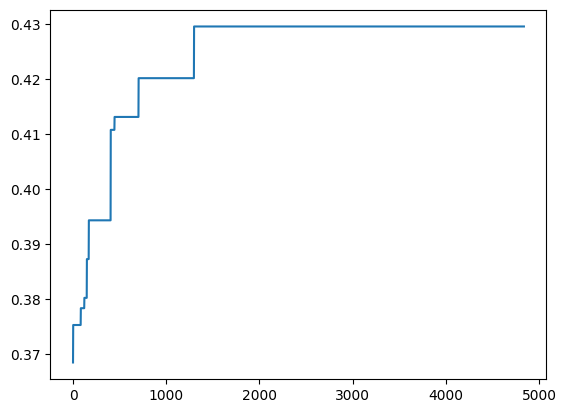

In [5]:
data.cummax()['score'].plot()

<Axes: xlabel='config/umap_ncomp'>

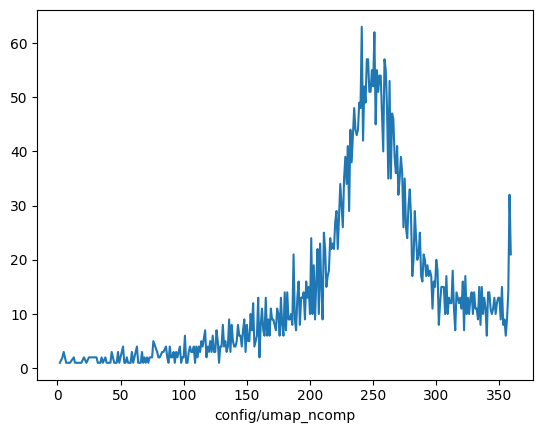

In [7]:
data.groupby('config/umap_ncomp').count()['score'].plot()

<Axes: xlabel='config/umap_ncomp'>

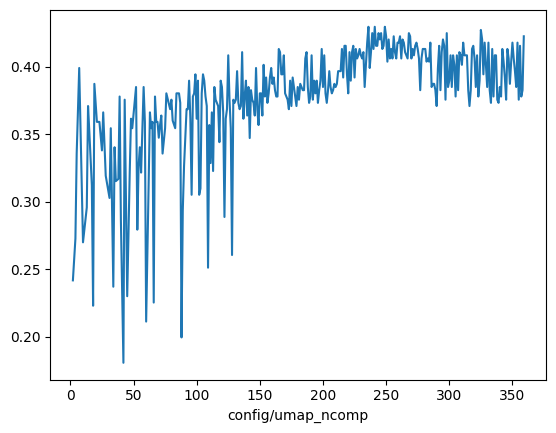

In [8]:
data.groupby('config/umap_ncomp').max()['score'].plot()

In [15]:
# data.groupby('config/umap_ncomp').boxplot(column='score')

data.groupby('config/umap_ncomp').boxplot(column='score', by='config/umap_ncomp')

2           Axes(0.1,0.866814;0.0373832x0.0331858)
4       Axes(0.14486,0.866814;0.0373832x0.0331858)
5       Axes(0.18972,0.866814;0.0373832x0.0331858)
7      Axes(0.234579,0.866814;0.0373832x0.0331858)
10     Axes(0.279439,0.866814;0.0373832x0.0331858)
                          ...                     
355             Axes(0.1,0.15;0.0373832x0.0331858)
356         Axes(0.14486,0.15;0.0373832x0.0331858)
357         Axes(0.18972,0.15;0.0373832x0.0331858)
358        Axes(0.234579,0.15;0.0373832x0.0331858)
359        Axes(0.279439,0.15;0.0373832x0.0331858)
Length: 329, dtype: object

Error in callback <function flush_figures at 0x000001DABEE4DB20> (for post_execute):


KeyboardInterrupt: 

In [37]:
def read_and_create_graph(path):
    with open(path, "r") as f:
        results = yaml.load(f, Loader=yaml.FullLoader)
    results
    dims = []
    scores = []
    max_scores =[]
    max_score = 0
    for item in results:
        dims.append(int(item['dim']))
        scores.append(float(item['score']))
        if float(item['score']) > max_score:
            max_score = float(item['score'])
        max_scores.append(max_score)
    return dims, scores, max_scores

(0.0, 1.0)

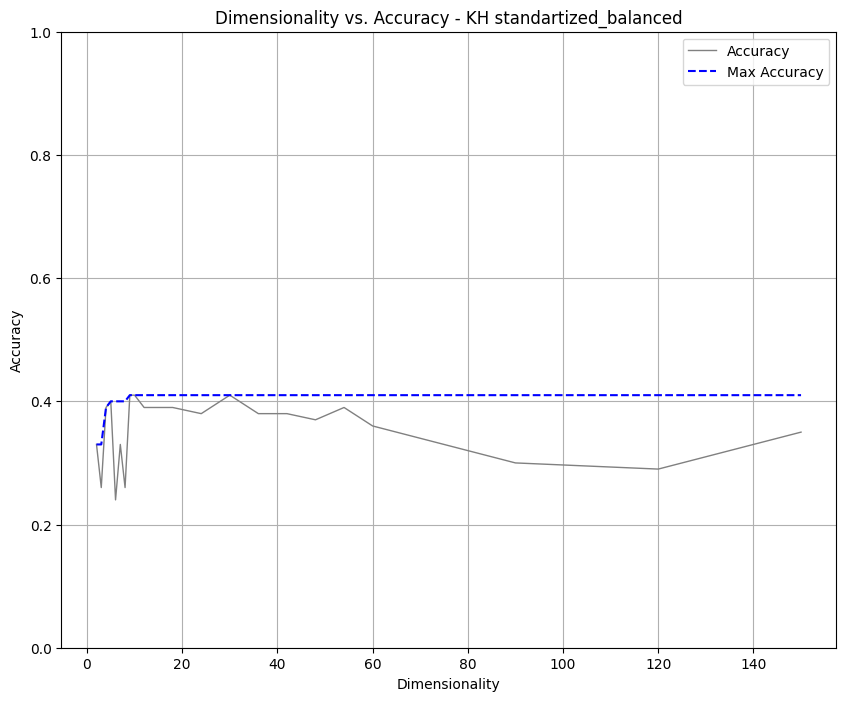

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dims, scores, max_scores = read_and_create_graph("results_kuhar_std0.01_top5/results_for_kuhar_all_dim.yaml")
ax.plot(dims, scores, label='Accuracy', linewidth=1.0, color='gray')
ax.plot(dims, max_scores, label='Max Accuracy', linewidth=1.5, color='blue', linestyle='--')
ax.grid()
ax.set_title('Dimensionality vs. Accuracy - KH standartized_balanced')
ax.set_xlabel('Dimensionality')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_ylim(0.0, 1.0)

| Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
| objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [ ]:
# | Trial name            | status     | loc               |   umap_mdist |   umap_neigh |   umap_spread |   iter |   total time (s) |    score |
# | objective_7f36f_00006 | TERMINATED | 172.17.0.12:15622 |    0.926511  |           36 |            27 |      1 |          25.2358 | 0.416667 |

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
dims, scores, max_scores = read_and_create_graph("results_kuhar_std0.01_top5/results_for_kuhar_all_dim.yaml")
ax.plot(dims, scores, label='Accuracy', linewidth=1.0, color='gray')
ax.plot(dims, max_scores, label='Max Accuracy', linewidth=1.5, color='blue', linestyle='--')
ax.grid()
ax.set_title('Dimensionality vs. Accuracy - KH standartized_balanced')
ax.set_xlabel('Dimensionality')
ax.set_ylabel('Accuracy')
ax.legend()
ax.set_ylim(0.0, 1.0)